In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

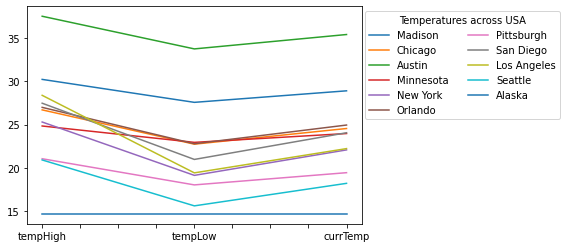

In [73]:
file = open('db.json')
data = json.load(file)

dataList = data['cities']
dct = {}

for city in dataList:
    dct[city['name']] = {"tempHigh": city['main']['temp_max'], "tempLow": city['main']['temp_min'], "currTemp": city['main']['temp']}

df = pd.DataFrame(data = dct)
graph = df.plot().legend(loc="upper center", bbox_to_anchor=(1.3, 1), ncol=2)
graph.set_title("Temperatures across USA")
graph

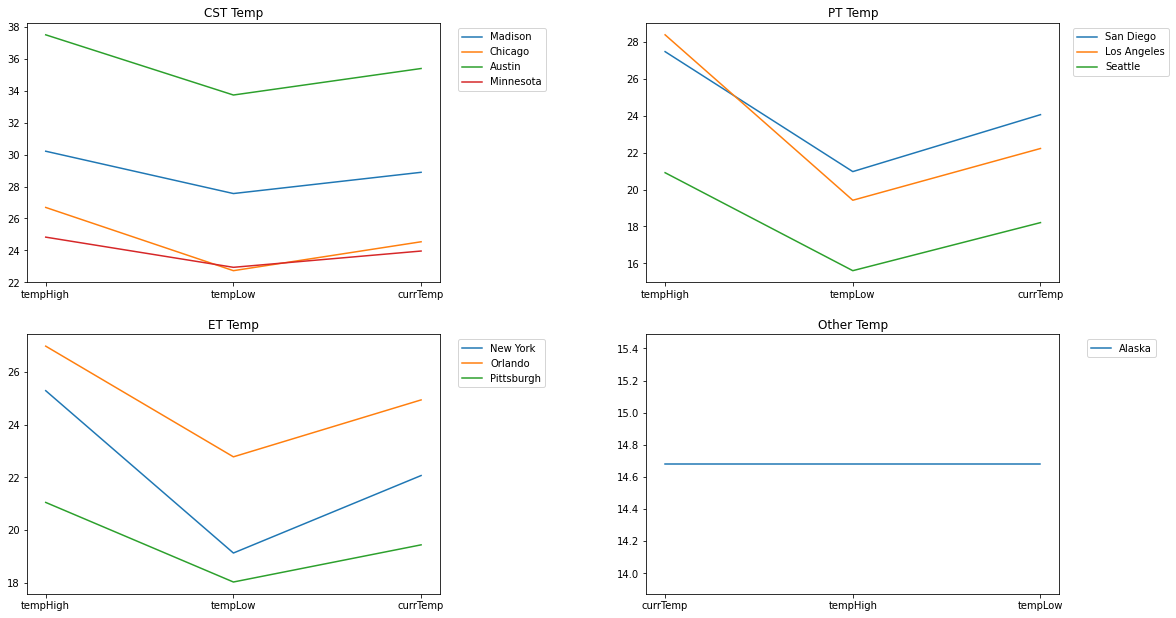

In [122]:
cst_dict = {}
et_dict = {}
pt_dict = {}
others_dict = {}

for city in dataList:
    if city['timezone'] == -18000: #CST
        cst_dict[city['name']] = {"tempHigh": city['main']['temp_max'], "tempLow": city['main']['temp_min'], 'currTemp': city['main']['temp']}
    elif city['timezone'] == -14400: #ET
        et_dict[city['name']] = {"tempHigh": city['main']['temp_max'], "tempLow": city['main']['temp_min'], 'currTemp': city['main']['temp']}
    elif city['timezone'] == -25200: #PT
        pt_dict[city['name']] = {"tempHigh": city['main']['temp_max'], "tempLow": city['main']['temp_min'], 'currTemp': city['main']['temp']}
    else:
        others_dict[city['name']] = {"tempHigh": city['main']['temp_max'], "tempLow": city['main']['temp_min'], 'currTemp': city['main']['temp']}

cst_df = pd.DataFrame(data = cst_dict)
et_df = pd.DataFrame(data = et_dict)
pt_df = pd.DataFrame(data = pt_dict)
others_df = pd.DataFrame(data = others_dict)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].plot(cst_df)
axs[0, 0].set_title("CST Temp")
axs[0, 0].legend(cst_df, loc="upper center", bbox_to_anchor=(1.15, 1))

axs[1, 0].plot(et_df)
axs[1, 0].set_title("ET Temp")
axs[1, 0].legend(et_df, loc="upper center", bbox_to_anchor=(1.15, 1))
axs[1, 0].sharex(axs[0, 0])

axs[0, 1].plot(pt_df)
axs[0, 1].set_title("PT Temp")
axs[0, 1].legend(pt_df, loc="upper center", bbox_to_anchor=(1.15, 1))

axs[1, 1].plot(others_df)
axs[1, 1].set_title("Other Temp")
axs[1, 1].legend(others_df, loc="upper center", bbox_to_anchor=(1.15, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)